In [42]:
#standard imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pydataset import data
from scipy import stats
from scipy.stats import poisson
#stats module!!!!!

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?

In [75]:
mean = 2

In [3]:
cars_wait = stats.poisson(lamb)
cars_wait

In [78]:
stats.poisson.pmf(0, mean)

0.1353352832366127

In [80]:
stats.poisson.sf(2, mean)

0.32332358381693654

In [81]:
stats.poisson.sf(0, mean)

0.8646647167633873

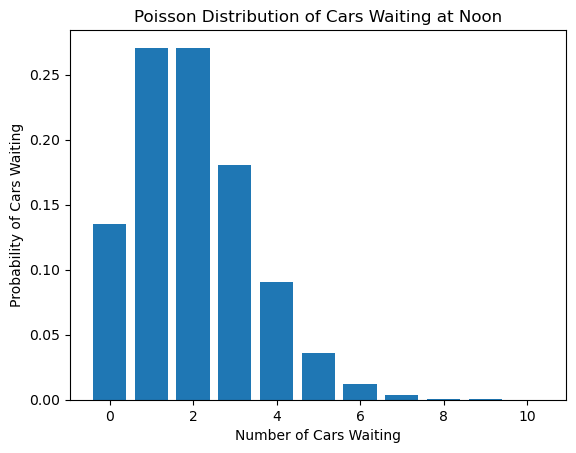

In [82]:
x = np.arange(0,11)
y = [cars_wait.pmf(i) for i in x]

plt.bar(x,y)

plt.xlabel('Number of Cars Waiting')
plt.ylabel('Probability of Cars Waiting')
plt.title('Poisson Distribution of Cars Waiting at Noon')
plt.show()

Using scipy, pandas, python Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship? Yes range is 2.75 to 2.84
If I have a GPA of 3.5, what percentile am I in?

In [7]:
mean = 3
sd = .3

μ σ = \mu, \sigma

In [10]:
GPA_dist = stats.norm(mean, sd)

In [11]:
GPA_dist.isf(.05)

3.4934560880854417

In [12]:
GPA_dist.ppf(.15)

2.689069983151863

In [87]:
GPA_2D = GPA_dist.ppf(.2)
GPA_2D

2.7475136299281258

In [89]:
GPA_3D = GPA_dist.ppf(.3)
GPA_3D

2.842679846187588

In [97]:
if (2.8 >= GPA_2D) & (2.8 <= GPA_3D):
    print ('True')
else: 
    print ('False')

True


In [84]:
GPA_dist.cdf(3.5)

0.9522096477271853

Using pandas, scipy, python, A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [23]:
click_through_rate = 0.02
num_visitors = 4326
observed_click_throughs = 97

In [27]:
# Calculate the mean (lambda)
lmbda = click_through_rate * num_visitors

# Use the Poisson distribution to calculate the probability of 97 or more click-throughs
prob = 1 - poisson.cdf(observed_click_throughs - 1, lmbda)

# Print the probability
prob

0.14211867659283195

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [29]:
# Define the parameters
num_questions = 60
possible_answers = 100

# Calculate the probability of getting all the answers wrong
prob_all_wrong = (1 - 1/possible_answers) ** num_questions

# Calculate the probability of at least one correct answer in the first 60 questions
prob_at_least_one_correct = 1 - prob_all_wrong

prob_at_least_one_correct

0.4528433576092388

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [1]:
# Define the parameters
num_students = 22 * 3
daily_break_area_visits = 0.9 * num_students
clean_probability = 0.03

# Calculate the probability of not cleaning the break area in a single day
prob_not_clean_single_day = (1 - clean_probability) ** daily_break_area_visits

prob_not_clean_single_day

0.16377251387711247

In [2]:
# Calculate the probability that the break area gets cleaned up at least once each day
prob_clean_each_day = 1 - prob_not_clean_single_day
prob_clean_each_day

0.8362274861228876

In [3]:
prob_not_clean_two_days = prob_not_clean_single_day ** 2
prob_not_clean_two_days

0.026821436301628997

In [33]:
prob_not_clean_week = prob_not_clean_single_day ** 5
prob_not_clean_week

0.00011781621791055058

You want to get lunch at a restauraunt, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from the restauraunt.

In [98]:
from scipy.stats import norm

# Define the parameters
mean = 15
std_dev = 3
max_people_in_line = 16.5

# Calculate the probability that there are 17 or fewer people in line
cumulative_probability = norm.cdf(max_people_in_line, mean, std_dev)

cumulative_probability

0.6914624612740131

Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?
What percent of employees earn more than 95,000?
What percent of employees earn between 65,000 and 80,000?
What do the top 5% of employees make?

In [47]:
import env

In [50]:
url = env.get_db_url('employees')

In [57]:
emp_sal = pd.read_sql("""select avg(salary), stddev(salary)
from employees
	join salaries on employees.emp_no = salaries.emp_no
    where to_date > curdate()""", url)

In [58]:
emp_sal

,avg(salary),stddev(salary)
0,72012.2359,17309.959336


In [66]:
mean = 72012.2359
std_dev = 17309.95933634675

In [67]:
prob_less_than_60000 = norm.cdf(60000, mean, std_dev)
prob_less_than_60000

0.2438569709201618

In [68]:
prob_more_than_95000 = 1 - norm.cdf(95000, mean, std_dev)
prob_more_than_95000

0.09208773564924777

In [69]:
prob_between_65000_80000 = norm.cdf(80000, mean, std_dev) - norm.cdf(65000, mean, std_dev)
prob_between_65000_80000

0.3350612231883823

In [70]:
top_5_percent_salary = norm.ppf(0.95, mean, std_dev)
top_5_percent_salary

100484.58529677245